# Data Preparation
<ul>
    <li> Data Loading</li>
    <li> Data cleaning</li>
    <li> Data Normalization</li>
</ul>

## Import necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# import scikit-learn libraries model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm

# Intellisense
%config IPCompleter.greedy=True

%matplotlib inline
plt.style.use('bmh')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
# Load Data Using Pandas, the data will be assigned to pandas dataframe 
cDF = pd.read_excel('./data/2020testcar-2020-03-03.xlsx', sheet_name='Sheet1')

In [5]:
# Display first top records of the dataset
cDF.head()

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,...,Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2020,aston martin,ASX,Aston Martin,DBS,7002PT7056,0,5.2,KASXV05.2AM5,Car,...,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [6]:
# Display 7 random records from the loaded dataset
cDF.sample(7)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,...,Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
1244,2020,GM,GMX,CADILLAC,CT6 AWD,366KKV4117,1,3.600,KGMXV03.6165,Car,...,35.440,-0.55360,0.026030,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2562,2020,Kia,KMX,Kia,Sorento,UM9L3AU01AC,1,3.300,KKMXV03.3JJ5,Car,...,9.228,0.22961,0.024945,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2852,2020,Mercedes-Benz,MBX,Mercedes-Benz,E 450 4MATIC (station wagon),S213E30DETC-Z9015-1,1,2.996,KMBXJ03.0U2A,Both,...,25.450,0.06700,0.020610,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2210,2020,Hyundai,HYX,HYUNDAI,Kona,OS8R6HU07AC,0,1.600,JHYXV01.61Y5,Car,...,11.579,0.31106,0.021177,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1437,2020,GM,GMX,CHEVROLET,COLORADO 4WD,28SPKVT007,0,2.800,KGMXT02.8358,Truck,...,23.630,0.36100,0.026420,SCR,Selective Catalytic Reduction,N,NaN,NaN,N,No averaging
1909,2020,Honda,HNX,HONDA,CIVIC 5DR,EHAA2C,1,1.500,HHNXV01.5XH2,Car,...,7.380,0.26090,0.016240,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2269,2020,Hyundai,HYX,HYUNDAI,SONATA HYBRID,DN8U0H0HA003F,0,2.000,LHYXV02.0E13,Car,...,12.176,0.04490,0.014968,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [7]:
# Get information about the dataset
cDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4304 entries, 0 to 4303
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Model Year                      4304 non-null   int64  
 1   Vehicle Manufacturer Name       4304 non-null   object 
 2   Veh Mfr Code                    4304 non-null   object 
 3   Represented Test Veh Make       4304 non-null   object 
 4   Represented Test Veh Model      4304 non-null   object 
 5   Test Vehicle ID                 4304 non-null   object 
 6   Test Veh Configuration #        4304 non-null   int64  
 7   Test Veh Displacement (L)       4304 non-null   float64
 8   Actual Tested Testgroup         4304 non-null   object 
 9   Vehicle Type                    4304 non-null   object 
 10  Rated Horsepower                4304 non-null   int64  
 11  # of Cylinders and Rotors       4140 non-null   float64
 12  Engine Code                     43

In [8]:
# Describe the dataset
cDF.describe()

,Model Year,Test Veh Configuration #,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,# of Gears,Transmission Overdrive Code,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,...,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Averaging Weighting Factor
count,4304.0,4304.000000,4304.000000,4304.000000,4140.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,...,4115.000000,4115.000000,4115.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,84.000000
mean,2020.0,1.073420,3.259457,293.782760,5.373671,6.390102,1.962593,4339.974442,3.676059,29.153462,...,3.031615,2.924921,2.615232,39.835684,0.206485,0.023239,12.074451,0.126516,0.022813,0.500000
std,0.0,1.729083,6.407933,154.185533,1.794392,2.892529,0.189779,829.243941,1.086502,13.461353,...,15.699799,15.572996,16.391226,12.527033,0.312131,0.006527,11.666090,0.362691,0.013699,0.032929
min,2020.0,0.000000,0.001000,1.000000,2.000000,1.000000,1.000000,2375.000000,0.000000,0.000000,...,-15.760000,-13.097000,-10.470000,15.431000,-0.777300,0.009890,-99.900000,-1.975200,-0.031400,0.350000
25%,2020.0,0.000000,2.000000,181.000000,4.000000,6.000000,2.000000,3750.000000,3.150000,24.000000,...,-0.661037,-0.508773,-0.530547,30.634000,0.035410,0.018632,5.840000,-0.011400,0.017477,0.500000
50%,2020.0,0.000000,2.500000,270.000000,4.000000,7.000000,2.000000,4250.000000,3.450000,26.300000,...,0.497000,0.330000,-0.110000,38.490000,0.234200,0.022150,11.574500,0.109755,0.021000,0.500000
75%,2020.0,1.000000,3.500000,355.000000,6.000000,8.000000,2.000000,5000.000000,3.850000,30.000000,...,2.102921,1.510000,0.253044,47.888000,0.397630,0.026190,17.950000,0.229602,0.025490,0.500000
max,2020.0,19.000000,99.999000,1500.000000,16.000000,10.000000,2.000000,6500.000000,9.670000,155.100000,...,99.990000,99.990000,99.990000,84.950000,1.403000,0.052210,64.520000,8.580000,0.252080,0.650000


In [9]:
# Select subset of features from the dataset
subDF = cDF[['Model Year', 'Represented Test Veh Make', 'Vehicle Type', 'Rated Horsepower', '# of Cylinders and Rotors', '# of Gears', 'Test Fuel Type Description', 'CO2 (g/mi)']]

In [10]:
subDF.sample(7)

,Model Year,Represented Test Veh Make,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,# of Gears,Test Fuel Type Description,CO2 (g/mi)
2587,2020,Kia,Car,201,4.0,7,Tier 2 Cert Gasoline,189.009077
43,2020,BMW,Both,255,4.0,8,Tier 2 Cert Gasoline,175.499000
3351,2020,SUBARU,Car,152,4.0,7,Tier 2 Cert Gasoline,171.340555
1607,2020,CHEVROLET,Truck,355,8.0,6,Tier 2 Cert Gasoline,330.970000
2420,2020,LAND ROVER,Both,550,8.0,8,Tier 2 Cert Gasoline,314.398300
1223,2020,CADILLAC,Car,320,4.0,10,Tier 2 Cert Gasoline,354.730000
2863,2020,Mercedes-Benz,Both,221,4.0,8,Tier 2 Cert Gasoline,197.753000


## Checking for missing values

In [11]:
# Lets check if there are any missing or null values in the dataset
subDF.isna().sum()

Model Year                      0
Represented Test Veh Make       0
Vehicle Type                    0
Rated Horsepower                0
# of Cylinders and Rotors     164
# of Gears                      0
Test Fuel Type Description      0
CO2 (g/mi)                    184
dtype: int64

## Handling missing values

* So there are 164, 184 missing values in "# of Cylenders and Rotors" and "CO2 (g/mi)" features respecrively
* There are several ways of replacing these missing values. These can be replaced with mean, mod, any custom value or remove rows with missing value in any feature.
* Here the values will be replaced with mean and mod for example, but for the final model training the records with missing values will be removed. as the goal here * is the regression model.
* and for regression model the better accuracy is achieved by removing the missing values rather than replacing with mean, mode or custom values

## Replacing missing values in "# of Cylinders and Rotors" feature with mode which is most frequently occuring value in this feature

In [12]:
filledDF = subDF["# of Cylinders and Rotors"].fillna(subDF["# of Cylinders and Rotors"].mode()[0])

In [13]:
filledDF.isna().sum()

0

# So there are no missing values in that feature as the missing values are replaced with mode value using fillna method.

* the original subDF dataframe is not changed, as the updated column is assigned to new dataframe column filledDF.
* In the following the rows with missing values will be removed from the original subDF dataframe

## For better understanding of handling missing values look at the following methods provided by pandas
* <b>DataFrame.isna</b>
    Indicate missing values.
* <b>DataFrame.notna</b>
    Indicate existing (non-missing) values.
* <b> DataFrame.fillna</b>
    Replace missing values.
* <b>Series.dropna</b>
    Drop missing values.
* <b>Index.dropna</b>
    Drop missing indices.

In [14]:
# Drop rows with missing values in any feature
subDF = subDF.dropna()

In [15]:
# Lets see if the rows with missing values are removed
subDF.isna().sum()

Model Year                    0
Represented Test Veh Make     0
Vehicle Type                  0
Rated Horsepower              0
# of Cylinders and Rotors     0
# of Gears                    0
Test Fuel Type Description    0
CO2 (g/mi)                    0
dtype: int64

### Missing values from the dataset are removed
* Describe categorical features

In [16]:
#for statistics on non-numeric fields, mention explicitly in describe method 
subDF.describe(include=['object', 'bool'])

,Represented Test Veh Make,Vehicle Type,Test Fuel Type Description
count,4074,4074,4074
unique,50,3,9
top,BMW,Car,Tier 2 Cert Gasoline
freq,348,2213,3631


### sort dataset by Co2 Emission feature in DESC order

In [17]:
#sort by column
subDF.sort_values(by="CO2 (g/mi)", ascending=False).head()

,Model Year,Represented Test Veh Make,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,# of Gears,Test Fuel Type Description,CO2 (g/mi)
4157,2020,BUGATTI,Car,1500,16.0,7,Cold CO Premium (Tier 2),958.0
4169,2020,LAMBORGHINI,Car,760,12.0,7,Tier 2 Cert Gasoline,937.0
4167,2020,LAMBORGHINI,Car,760,12.0,7,Tier 2 Cert Gasoline,931.0
4153,2020,BUGATTI,Car,1500,16.0,7,Tier 2 Cert Gasoline,855.0
4166,2020,LAMBORGHINI,Car,760,12.0,7,Tier 2 Cert Gasoline,854.0


# Visualization
## Visualize vehicles w.r.t their manufacturer

[Text(0, 0, 'aston martin'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'BYD Motors Inc.'),
 Text(0, 0, 'FCA Italy'),
 Text(0, 0, 'FCA US LLC'),
 Text(0, 0, 'Ferrari'),
 Text(0, 0, 'FOMOCO'),
 Text(0, 0, 'GM'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Jaguar Land Rover L'),
 Text(0, 0, 'Karma Automotive, L'),
 Text(0, 0, 'Kia'),
 Text(0, 0, 'Lotus'),
 Text(0, 0, 'Maserati'),
 Text(0, 0, 'MAZDA'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'Mitsubishi Motors Co'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Rolls-Royce'),
 Text(0, 0, 'Roush'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Tesla'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen Group of'),
 Text(0, 0, 'Volvo')]

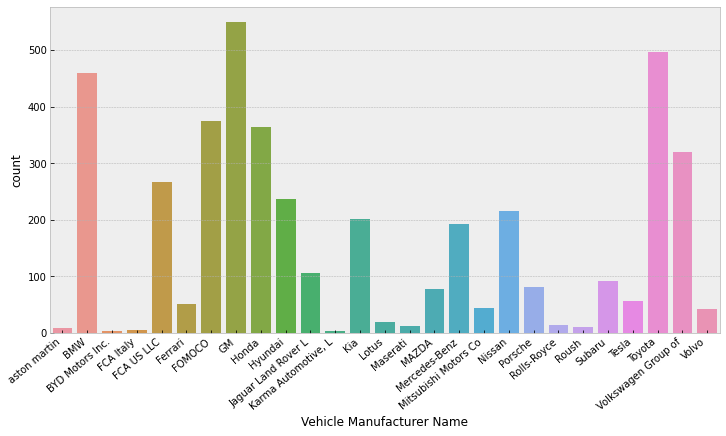

In [18]:
plt.figure(figsize=(12, 6))
axv = sns.countplot(x='Vehicle Manufacturer Name', data=cDF)
axv.set_xticklabels(axv.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
#plt.show()

## What Manufacturer vehicles emit how much Co2 Gas
* Plot Car type against the Co2 emission

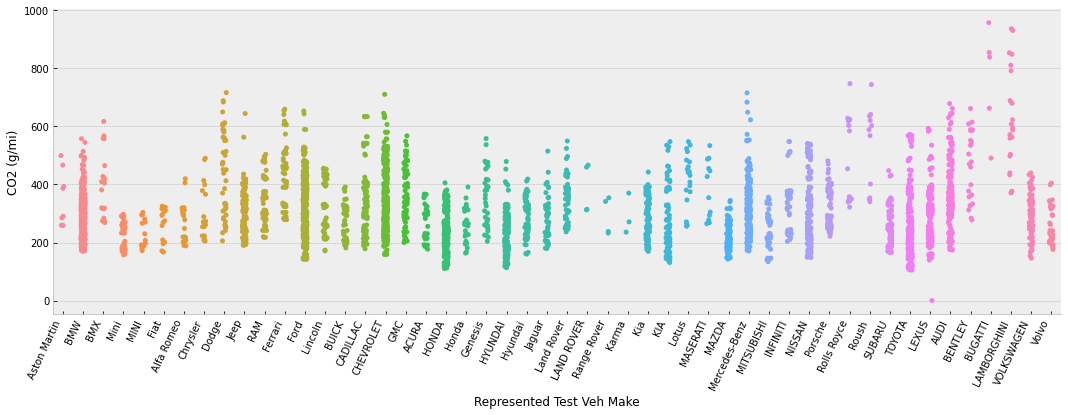

In [19]:
cplot = sns.catplot(x="Represented Test Veh Make", y="CO2 (g/mi)", jitter=True, data=subDF, height=5, aspect=3)
cplot.set_xticklabels(rotation=65, ha="right")

## Plot Gears vs Co2 Emission

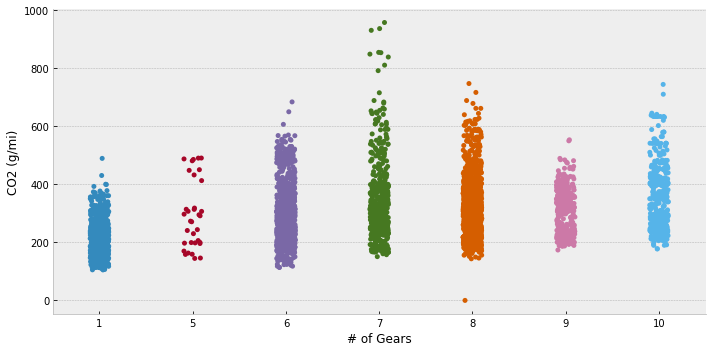

In [20]:
sns.catplot(x="# of Gears", y="CO2 (g/mi)", data=subDF, height=5, aspect=2)

### Plot No. of Cylenders vs Co2 emission

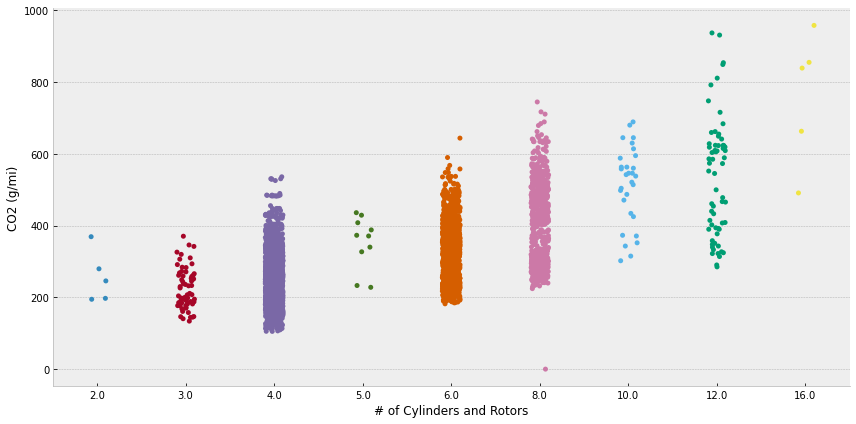

In [21]:
sns.catplot(x="# of Cylinders and Rotors", y="CO2 (g/mi)", data=subDF, height=6, aspect=2)

### Lets see the effect of Fuel Type on Co2 Emission

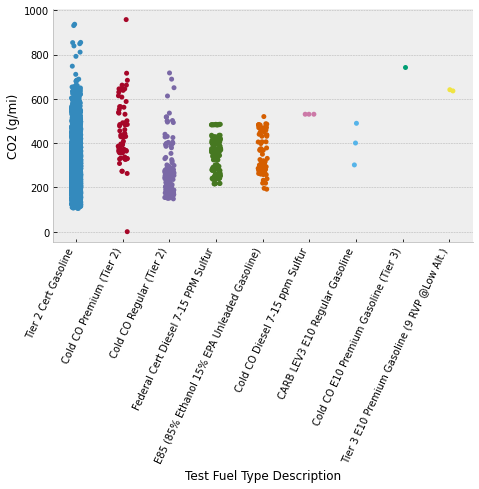

In [22]:
# plot Co2 emission against fuel type
fvcplot = sns.catplot(x="Test Fuel Type Description", y="CO2 (g/mi)", data=subDF, height=4, aspect=2)
fvcplot.set_xticklabels(rotation=65, ha='right')

# Model Training
## Handling categorical values
### There are categorical values in the dataset. These needs to be transformed using one-hot encoding
* Perform label encoding on categorical values
* Perform one-hot encoding on encoded features


In [23]:
#label and one-hot encoding
enDF = pd.get_dummies(subDF,drop_first=True)

In [24]:
enDF.sample(7)

,Model Year,Rated Horsepower,# of Cylinders and Rotors,# of Gears,CO2 (g/mi),Represented Test Veh Make_AUDI,Represented Test Veh Make_Alfa Romeo,Represented Test Veh Make_Aston Martin,Represented Test Veh Make_BENTLEY,Represented Test Veh Make_BMW,...,Vehicle Type_Car,Vehicle Type_Truck,Test Fuel Type Description_Cold CO Diesel 7-15 ppm Sulfur,Test Fuel Type Description_Cold CO E10 Premium Gasoline (Tier 3),Test Fuel Type Description_Cold CO Premium (Tier 2),Test Fuel Type Description_Cold CO Regular (Tier 2),Test Fuel Type Description_E85 (85% Ethanol 15% EPA Unleaded Gasoline),Test Fuel Type Description_Federal Cert Diesel 7-15 PPM Sulfur,Test Fuel Type Description_Tier 2 Cert Gasoline,Test Fuel Type Description_Tier 3 E10 Premium Gasoline (9 RVP @Low Alt.)
2751,2020,385,6.0,9,234.770000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4092,2020,349,6.0,8,234.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3578,2020,235,4.0,6,316.200491,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2422,2020,550,8.0,8,312.557800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3749,2020,169,4.0,1,209.814884,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1990,2020,128,4.0,6,171.490000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
12,2020,248,4.0,8,195.260000,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


# Model Training
## Split data into training and testing

In [26]:
X = enDF.drop(columns='CO2 (g/mi)')
y = enDF['CO2 (g/mi)'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
print("X_train: {}, X_test: {}, y_train: {}, y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (2851, 63), X_test: (1223, 63), y_train: (2851,), y_test: (1223,)


In [28]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
Co2_pred = regr.predict(X_test)

In [29]:
Co2_pred

array([203.63614594, 204.83339678, 302.29173959, ..., 298.92716327,
       457.58097296, 321.29189657])

In [30]:
y_test

1820    308.20000
2140    242.55350
585     229.36400
481     295.07288
2800    420.90000
          ...    
3190    148.00000
1330    223.10200
1143    416.05800
1393    327.81700
3615    380.00000
Name: CO2 (g/mi), Length: 1223, dtype: float64

In [31]:
regr.score(X_test, y_test)

0.5154442027775171